In [1]:
import cv2
import matplotlib.pyplot as plt


In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

# Importing Class Labels 

In [4]:
classLabels =[]
file_name = 'Labels.txt'
with open(file_name ,mode='rt')as fpt:
  classLabels = fpt.read().rstrip('\n').split('\n')    # separating the labels and storing in Classlabels

In [5]:
print(classLabels)
print(len(classLabels))

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)  # 255/2 = 127.5
model.setInputMean((127.5 ,127.5 ,127.5)) # mobilenet =>[-1 , 1]
model.setInputSwapRB(True)                # BGR to RGB

<dnn_Model 000001E27FD7F610>

**Read a Image**


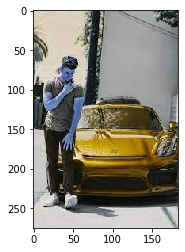

In [7]:
img = cv2.imread('img2.jpg')
plt.imshow(img) # it in bgr format

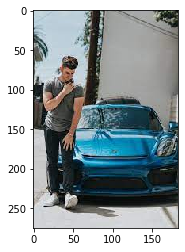

In [8]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [9]:
ClassIndex , confidece , bbox = model.detect(img,confThreshold=0.6)


In [10]:
print(ClassIndex)

[[1]
 [3]]


**set up of frame and text indication**

In [11]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for classInd , conf ,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
  #cv2.rectangle(frame ,(x,y)(x+w , y+h),(255,0,0)2)
  #cv2.putText(img,text, (text_offset_x, text_offset_y), font , fontScale = font_scale ,color=(0,0,0),thickness=1)
  cv2.rectangle(img,boxes ,(255,0,0),2)
  cv2.putText(img,classLabels[classInd-1],(boxes[0]+10,boxes[1]+40),font , fontScale = font_scale , color =(0,255,0),thickness=3)

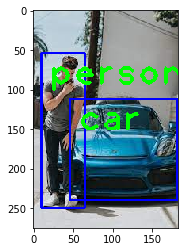

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

**Detection in Video**

In [13]:
cap = cv2.VideoCapture( "VDO4.mp4")

#check if the video is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
  
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.6)

    print(ClassIndex)
    

    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0] + 10,boxes[1]+40), font, fontScale = font_scale, color=(0, 225, 0))
  
    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllwindows()

[[1]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
()
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]
 [1]]
[[1]]
[[1]
 [1]]
[[1]]
[[1]]
[[1]]


[[6]
 [1]]
[[6]]
[[6]]
[[6]]
[[6]
 [1]]
[[6]
 [1]
 [1]]
[[1]
 [6]]
[[1]
 [6]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[1]
 [1]
 [6]]
[[ 1]
 [ 1]
 [ 6]
 [31]]
[[1]
 [6]
 [1]]
[[6]
 [1]
 [1]]
[[1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [6]]
[[ 1]
 [ 6]
 [ 1]
 [31]]
[[1]
 [6]
 [1]]
[[6]
 [1]
 [1]]
[[ 6]
 [ 1]
 [ 1]
 [ 1]
 [31]]
[[6]
 [1]
 [1]

[[6]
 [1]
 [1]
 [1]
 [1]
 [7]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [7]]
[[6]
 [1]
 [1]
 [1]
 [7]
 [1]]
[[6]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [7]]
[[6]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [7]]
[[6]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [7]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [7]]
[[1]
 [1]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [1]
 [1]
 [6]
 [7]]
[[1]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [6]]
[[1]
 [1]
 [6]
 [1]]
[[1]
 [6]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [1]
 [1]
 [6]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [3]
 [6]
 [1]]
[[1]
 [1]
 [6]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[1]
 [6]
 [1]
 [3]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]]
[[6]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [6

[[1]
 [1]
 [1]
 [3]
 [1]
 [3]]
[[ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [ 3]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [64]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 3]
 [64]]
[[1]
 [1]
 [1]
 [1]
 [3]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [64]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[1]
 [1]
 [1]
 [3]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [ 1]
 [33]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [33]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [33]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [ 3]
 [33]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [33]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]
 [33]
 [ 3]
 [64]
 [ 3]
 [ 1]]
[[ 1]
 [ 1]
 [ 1]


KeyboardInterrupt: 

In [13]:
cap = cv2.VideoCapture(0)

#check if the video is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open WebCam")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
  
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.6)

    print(ClassIndex)
    

    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0] + 10,boxes[1]+40), font, fontScale = font_scale, color=(0, 225, 0))
  
    cv2.imshow('Object Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllwindows()

()
()
()
()
()
()
()
()
()


KeyboardInterrupt: 